# Delicious Golden Apple Price Challenge Regression Model

Introduction
------------

**Objective**

To build a regression algorithm that is capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost.

This notebook aims to help all producing industries to improve their stock and communicate an accurate price to their customers, also to compare if their prices fluctuate by season as the yields from farms fluctuate by season.


Importing Required Libraries
---------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading Data Into The Data Frame
-------------------------

In [15]:
train = pd.read_csv(r'C:\Users\Dineo\OneDrive\Documents\Coursework - Explore DataScience\Sprint 5 - May 2021\Predict\df-train_set.csv')

In [16]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [17]:
train.shape

(64376, 13)

The dataframe has many different types of produce so we select only observations listed for Golden Delicious Apples.

In [18]:
df_train = df_train[df_train["Commodities"] == "APPLE GOLDEN DELICIOUS"]

In [19]:
df_train.head()


,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [20]:
#Request column information
df_train.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [21]:
df_train.shape

(1952, 13)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [25]:
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [26]:
df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

All features in the dataset present with a very large kurtosis, indicating that we have large number of outliers in these features. 

In [27]:
df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

All features present a very large positive skew. 

In [28]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


## Univariate Analysis 

In [29]:
df_train["avg_price_per_kg"].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

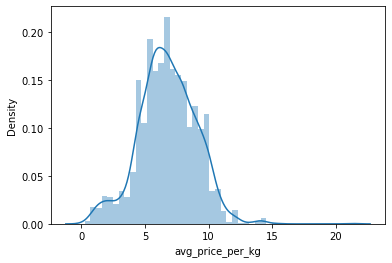

In [30]:
sns.distplot(df_train["avg_price_per_kg"])

In [31]:
print("Skewness: %f" % df_train["avg_price_per_kg"].skew())
print("Kurtosis: %f" % df_train["avg_price_per_kg"].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


We see from our analysis of the skewness of target variable avg_price_per_kg, that the distribution above that there is a moderate positive skew. And from the analysis of the target's excess kurtosis we can see that we have tails that are heavier than those in a normal distribution.

array([[<AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>,
        <AxesSubplot:title={'center':'Sales_Total'}>],
       [<AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Total_Kg_Sold'}>,
        <AxesSubplot:title={'center':'Stock_On_Hand'}>],
       [<AxesSubplot:title={'center':'Weight_Kg'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

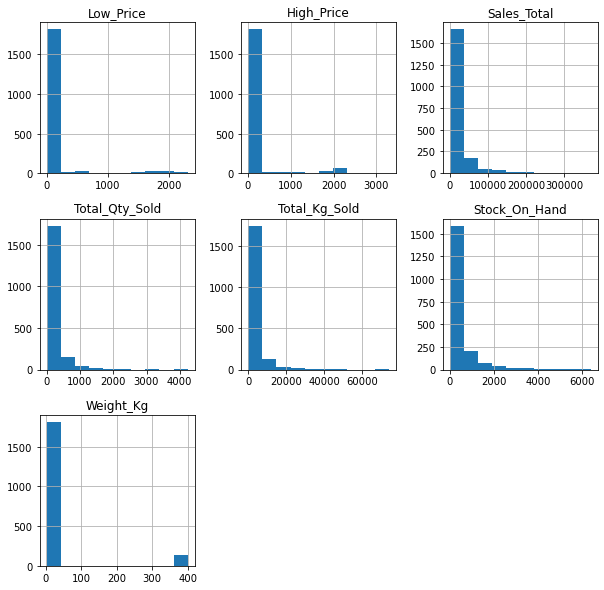

In [32]:
features = ['Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Weight_Kg'] # create a list of all numerical features
df_train[features].hist(figsize=(10,10))

<AxesSubplot:xlabel='count', ylabel='Province'>

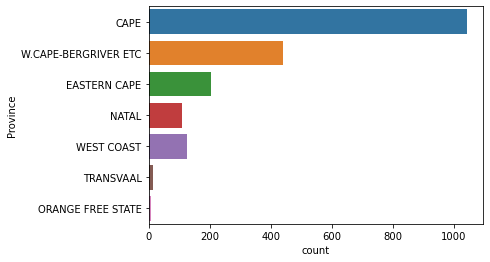

In [34]:
sns.countplot(y='Province', data=df_train)

<AxesSubplot:xlabel='count', ylabel='Container'>

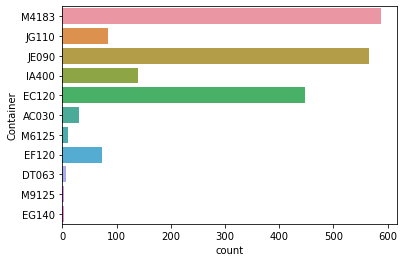

In [35]:
sns.countplot(y='Container', data=df_train)

<AxesSubplot:xlabel='Size_Grade', ylabel='count'>

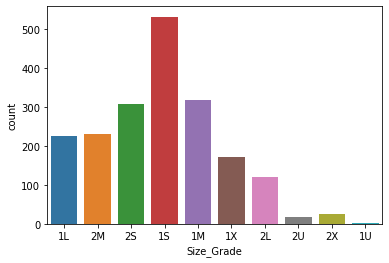

In [36]:
sns.countplot('Size_Grade', data = df_train)

## Multivariate Analysis

In [37]:
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


Already we can see evidence of multicollinearity between some variables.  We would have to keep a watchful eye on these relationships.  None of the predictors have a relationship (positive or negative) with our response variable.  Perhaps once we deal with the outliers this will change.

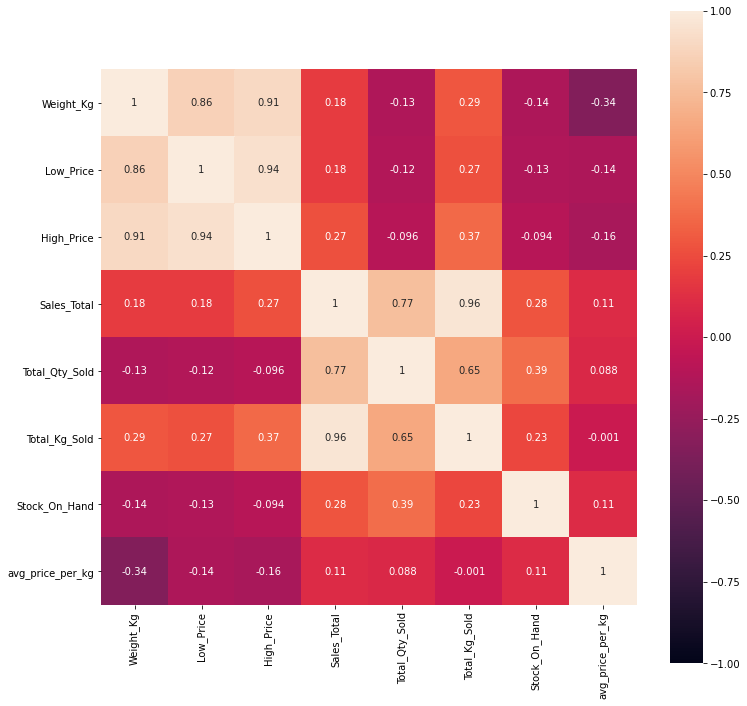

In [38]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, square=True, annot=True);

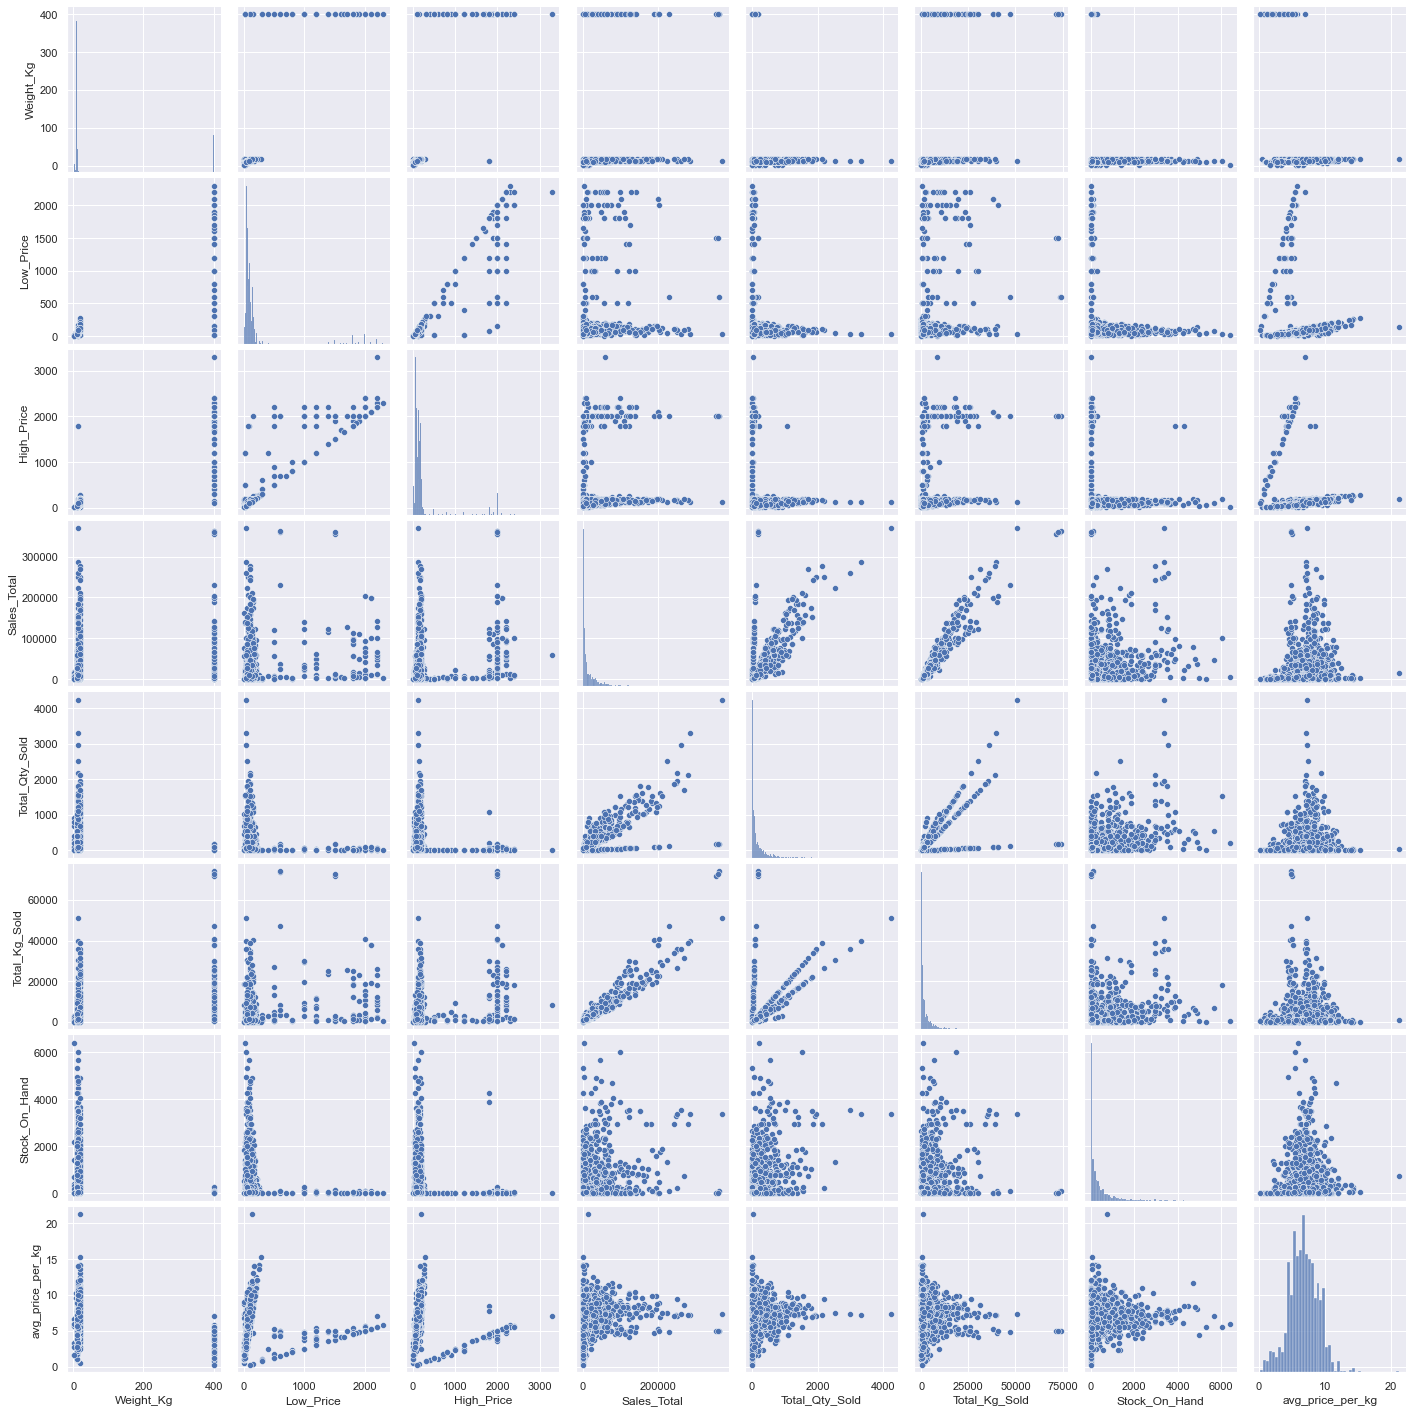

In [40]:
sns.pairplot(df_train)

<AxesSubplot:xlabel='High_Price'>

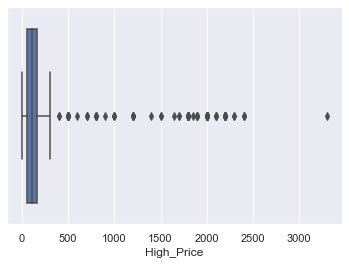

In [47]:
sns.boxplot(x='High_Price', data=df_train)

<AxesSubplot:xlabel='Low_Price'>

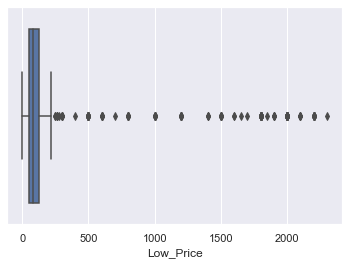

In [44]:
sns.boxplot(x='Low_Price', data=df_train)

<AxesSubplot:xlabel='Weight_Kg'>

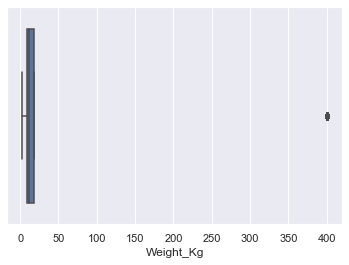

In [45]:
sns.boxplot(x='Weight_Kg', data=df_train)

<AxesSubplot:xlabel='Sales_Total'>

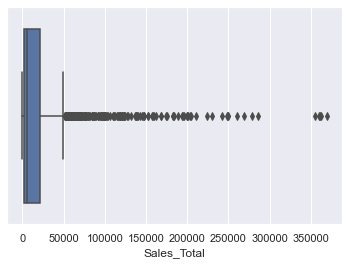

In [46]:
sns.boxplot(x='Sales_Total', data=df_train)

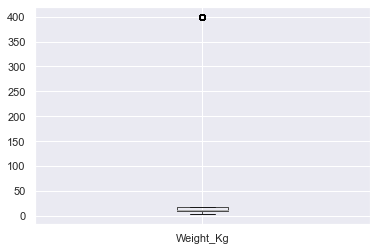

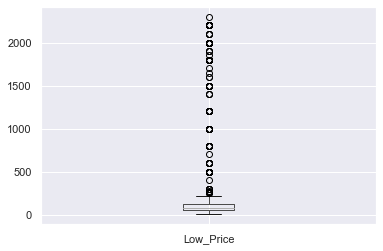

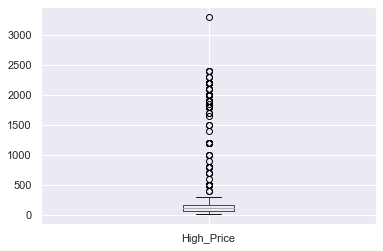

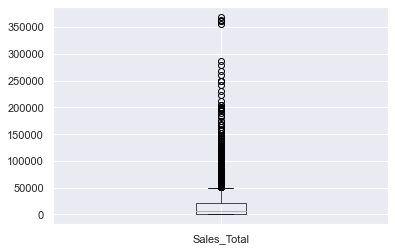

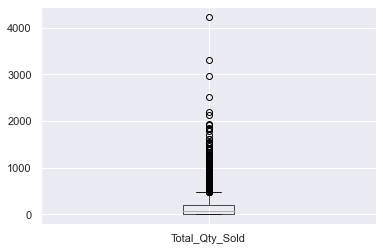

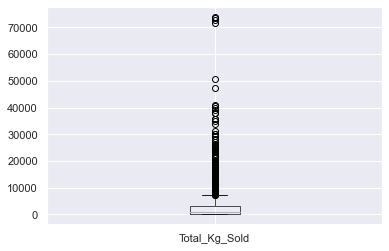

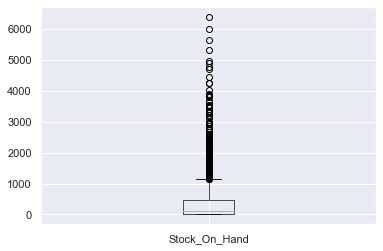

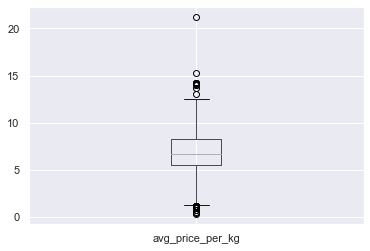

In [50]:
for column in df_train:
    if df_train[column].dtypes == 'float64' or df_train[column].dtypes == 'int64':
        plt.figure()
        df_train.boxplot([column])